# Jarvis march algorithm

Use the cell below for all python code needed to realise the Jarvis march algorithm (including any auxiliary data structures and functions you might need). The `jarvismarch()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points (`outputSet`) that lie on the convex hull.

In [1]:
import random

def find_leftmost(points):
    #Set an abitrary point in set to be initial leftmost
    leftmost = points[0]
    #For each point in the set, if its x value is lower than the current leftmost's, it's the new leftmost
    for point in points:
        if point[0]<leftmost[0]:
            leftmost = point
    return leftmost

def cross_product(a, b, c):
    #   If the result is negative, a->c is clockwise to a->b
    #   Elif the result is positive, a->c is anti-clockwise to a->b
    #   Else the result is zero, so b and c are colinear
    x_1 = a[0] - b[0] #Difference in x of a and b
    x_2 = a[0] - c[0] #'' of a and c
    y_1 = a[1] - b[1] #Difference in y of a and b
    y_2 = a[1] - c[1] #'' of a and c
    return y_2 * x_1 - y_1 * x_2

def distance(a, b):
    return ( (a[0]-b[0])**2 + (a[1]-b[1])**2 ) ** (1/2) #Pythagoras' theorem

def jarvismarch(points):
    if len(points) < 3:
        raise ValueError("Too few points in input.")
    hull = []
    leftmost = find_leftmost(points)
    #The leftmost point in the set is certainly in the convex hull
    hull.append(leftmost)
    current_point = leftmost

    while True:
        target = points[0] #Tracks the most anti-clockwise point to the current point found so far
        colinears = []
        
        #Find point which follows the current point. That is, the point which is most to the left of the current point from its perspective
        for point in points:
            if point==current_point or point==target:
                continue
            cross = cross_product(current_point, target, point)
            if cross<0: #The new point is clockwise to target, so disregard it
                continue
            elif cross>0: #The new point is anti-clockwise to target, so it's more likely to be in convex hull
                target = point
                colinears = [] #Reset colinears
            else: #The new point is colinear to target. Add closer one to colinears, and set furthur one as target
                if distance(current_point, target)<distance(current_point, point):
                    #colinears.append(target)
                    target = point      
        if target == leftmost: #If we've wrapped back around to the first point, the hull is sealed
            break

        hull.append(target)
        current_point = target
    return hull

Use the cell below for all python code needed to generate test data points (both random and those representing worst-case scenario).

In [2]:
import random
import math

maximumX = 32767
maximumY = 32767
minX = 0
minY = 0
mid = [(maximumX-minX)/2, (maximumY-minY)/2]
data_points = [100, 500, 1000, 5000, 10000, 15000, 20000]

# code for random data generation
def random_data_generation(n):
    points = []
    for p in range(n):
        while True:
            x = random.randint(minX, maximumX)
            y = random.randint(minY, maximumY)
            point = [x,y]
            if point not in points:
                break
        points.append(point)
    return points

# code for worst case data generation
# worst case scenario is to put all points on a circle
def worst_data_generation(n):
    radius = maximumX//2
    points = []
    pi = math.pi
    for p in range(n):
        angle = random.uniform(0, 2*pi)
        x = radius * math.cos(angle)
        y = radius * math.sin(angle)
        point = [x,y]
        points.append(point)
    return points

Use the cell below for all python code needed to test the `jarvismarch()` function on the data generated above.

In [3]:
import timeit

#test code for random data generation
def random_time(points, iterations):
    time_data = []
    data = random_data_generation(points)
    total_time = 0
    for i in range(iterations):
        start_time = timeit.default_timer()
        jarvismarch(data)
        time = timeit.default_timer() - start_time
        time_data.append(time)
    return time_data

#test code for worst case data generation
def worst_time(points, iterations):
    time_data = []
    data = worst_data_generation(points)
    total_time = 0
    for i in range(iterations):
        start_time = timeit.default_timer()
        jarvismarch(data)
        time = timeit.default_timer() - start_time
        time_data.append(time)
    return time_data

*Optional*: Feel free to use the code below on small datasets (e.g., N = 10) to visually inspect whether the algorithm has been implemented correctly. The fragment below assumes both `inputSet` and `outputSet` to be lists of 2D points, with each point being a list of 2 elements (e.g., `[[x1,y1], [x2,y2], ..., [x_k,y_k]]`)

## Plotting Graphs

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# plot a scattergraph with a line of best fit for all execution timings across 5 iterations  
def plot_scatter(x, y):
    #plot scattergraph
    plt.scatter(x,y)
    plt.title("Scatterplot of Results through 5 Iterations")
    plt.xlabel("Number of Points")
    plt.ylabel("Time (secs)") 
    
    #plot best-fit line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')
    plt.show()

## Test for Random Data

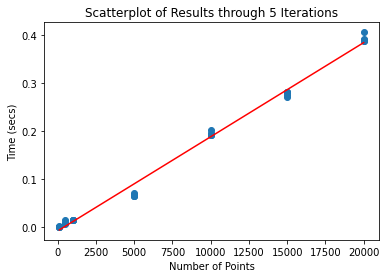

The mean time for random cases for 100 data points are: 0.0007905000000000939 seconds
The mean time for random cases for 500 data points are: 0.009756199999999637 seconds
The mean time for random cases for 1000 data points are: 0.014753839999999485 seconds
The mean time for random cases for 5000 data points are: 0.06641409999999937 seconds
The mean time for random cases for 10000 data points are: 0.19486281999999946 seconds
The mean time for random cases for 15000 data points are: 0.27741110000000047 seconds
The mean time for random cases for 20000 data points are: 0.39198877999999837 seconds


In [5]:
all_random_time = []
scatter_data = []
total_mean_time = []
count = 0
iterations = 5

for i in data_points:
    all_random_time = random_time(i, iterations)
    for data in all_random_time:
        scatter_data.append([i, data])

#plot scattergraph of results
input_xs, input_ys = zip(*scatter_data)
plot_scatter(input_xs, input_ys)

#to group tuple in groups of 5
def grouper(n, iterable): 
    args = [iter(iterable)] * n 
    return zip(*args) 

#print mean execution timings of each data point
group = tuple(grouper(5, input_ys))  
total_mean_time = [sum(tup) for tup in group]
for i in data_points:
    print("The mean time for random cases for", i, "data points are:", (total_mean_time[count]/5), "seconds")
    count += 1




## Test for Worst Case

In [ ]:
all_worst_time = []
scatter_data = []
total_mean_time = []
count = 0
iterations = 5

for i in data_points:
    all_worst_time = worst_time(i, iterations)
    for data in all_worst_time:
        scatter_data.append([i, data])

#plot scattergraph of results
input_xs, input_ys = zip(*scatter_data)
plot_scatter(input_xs, input_ys)

#to group tuple in groups of 5
def grouper(n, iterable): 
    args = [iter(iterable)] * n 
    return zip(*args) 

#print mean execution timings of each data point
group = tuple(grouper(5, input_ys))  
total_mean_time = [sum(tup) for tup in group]
for i in data_points:
    print("The mean time for worst cases for", i, "data points are:", (total_mean_time[count]/5), "seconds")
    count += 1
